<a href="https://colab.research.google.com/github/santhimaddipudi/Python-work/blob/master/descriptive_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descriptive statistics

In [3]:
import statistics
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
forbes = pd.read_csv("/content/sample_data/forbes.csv")

forbes.head()

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,1,ICBC,China,151.4,42.0,3473.2,229.8,Financials,Major Banks
1,2,China Construction Bank,China,134.2,35.0,3016.6,200.5,Financials,Regional Banks
2,3,Berkshire Hathaway,United States,222.9,24.1,620.9,409.9,Financials,Investment Services
3,4,JPMorgan Chase,United States,102.5,24.2,2513.0,306.6,Financials,Major Banks
4,5,Wells Fargo,United States,97.6,21.9,1943.4,274.4,Financials,Major Banks


In [ ]:
forbes.isnull()

In [6]:
forbes.isnull().sum()

Rank              0
Company           0
Country           0
Sales             0
Profits           0
Assets            0
Market Value      0
Sector          197
Industry        491
dtype: int64

In [7]:
forbes.dropna(inplace=True)

forbes.isnull().sum()

Rank            0
Company         0
Country         0
Sales           0
Profits         0
Assets          0
Market Value    0
Sector          0
Industry        0
dtype: int64

In [9]:
forbes.shape

(1508, 9)

In [10]:
market_value_mean = forbes['Market Value'].mean()

market_value_mean

26.978494031830238

In [17]:
market_value_median=forbes['Market Value'].median()
market_value_median

13.1

In [11]:
forbes['Market Value'].min()

0.24

In [12]:
forbes['Market Value'].max()

752.0

In [13]:
# sector is a categorical data

forbes['Sector'].value_counts()

Financials                    474
Consumer Discretionary        209
Industrials                   192
Materials                     145
Consumer Staples              106
Information Technology        103
Utilities                      86
Energy                         79
Health Care                    71
Telecommunication Services     43
Name: Sector, dtype: int64

In [14]:
forbes['Sector'].mode()

0    Financials
Name: Sector, dtype: object

##box plot
mean
median
25th percentile
75th percentile

maximum values are where in the data
outliers

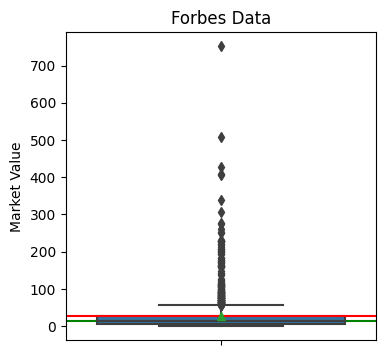

In [20]:
plt.figure(figsize=(4,4))

sns.boxplot(data=forbes, y = "Market Value", showmeans = True)

plt.axhline(y=market_value_mean, color='r', linestyle='-')
plt.axhline(y=market_value_median, color='g', linestyle='-')

plt.title("Forbes Data")
plt.show()

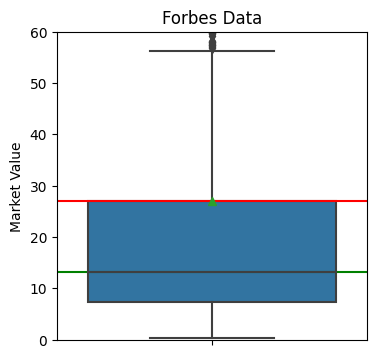

In [25]:
plt.figure(figsize=(4,4))

sns.boxplot(data=forbes, y = "Market Value", showmeans = True)
plt.ylim(0,60)

plt.axhline(y=market_value_mean, color='r', linestyle='-')
plt.axhline(y=market_value_median, color='g', linestyle='-')

plt.title("Forbes Data")
plt.show()

In [26]:
gd = forbes.groupby('Sector', as_index=False).count()

gd

,Sector,Rank,Company,Country,Sales,Profits,Assets,Market Value,Industry
0,Consumer Discretionary,209,209,209,209,209,209,209,209
1,Consumer Staples,106,106,106,106,106,106,106,106
2,Energy,79,79,79,79,79,79,79,79
3,Financials,474,474,474,474,474,474,474,474
4,Health Care,71,71,71,71,71,71,71,71
5,Industrials,192,192,192,192,192,192,192,192
6,Information Technology,103,103,103,103,103,103,103,103
7,Materials,145,145,145,145,145,145,145,145
8,Telecommunication Services,43,43,43,43,43,43,43,43
9,Utilities,86,86,86,86,86,86,86,86


In [27]:
gd = gd[['Sector', 'Rank']]

gd = gd.sort_values(by='Rank', ascending=False)

gd

,Sector,Rank
3,Financials,474
0,Consumer Discretionary,209
5,Industrials,192
7,Materials,145
1,Consumer Staples,106
6,Information Technology,103
9,Utilities,86
2,Energy,79
4,Health Care,71
8,Telecommunication Services,43


##pie chart

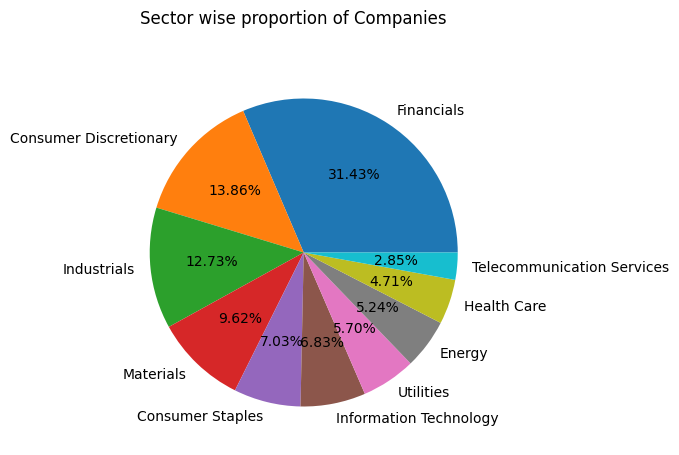

In [35]:
plt.figure(figsize=(8,5))

plt.pie(gd['Rank'], labels=gd['Sector'], autopct='%.2f%%')

plt.suptitle("Sector wise proportion of Companies")

plt.show()

##range

In [36]:
profit_max = forbes['Profits'].max()

profit_max

45.2

In [37]:
profit_min = forbes['Profits'].min()

profit_min

-13.0

In [38]:
profit_range = profit_max - profit_min

profit_range

58.2

##inter quartile range

In [39]:
# 25th percentile

Q1 = np.quantile(forbes['Profits'], 0.25)
Q1

0.34975

In [40]:
# 75th percentile

Q3 = np.quantile(forbes['Profits'], 0.75)
Q3

1.4249999999999998

In [41]:
IQR = Q3 - Q1

IQR

1.0752499999999998